In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import Basic_model
from Basic_model import ROC_plot, Centiles_plot

ModuleNotFoundError: No module named 'Basic_model'

In [2]:
data = pd.read_csv('../data/derivatives/features_train1.csv')

In [7]:
data.head()

,distance_goal,angle_goal,is_goal,empty_goal
0,13.000000,-22.619865,0,0
1,13.341664,-77.005383,0,0
2,76.157731,29.931512,0,0
3,57.974132,14.995079,0,0
4,61.717096,-26.980231,0,0


In [36]:
X = data['distance_goal']
y = data['is_goal']
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=200
        )

In [38]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
reshaped_X_val = X_val.values.reshape(-1,1)
reshaped_y_val = y_val.values.reshape(-1,1)

In [39]:
clf = LogisticRegression().fit(X_train, y_train)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
y_pred = clf.predict(reshaped_X_val)

# Calculer la précision du modèle
accuracy = accuracy_score(reshaped_y_val, y_pred)
print(accuracy)

0.9049378678875082


In [41]:
y_score = clf.predict_proba(reshaped_X_val)
print(y_score)

[[0.90726948 0.09273052]
 [0.89572064 0.10427936]
 [0.88235979 0.11764021]
 ...
 [0.97790362 0.02209638]
 [0.82147907 0.17852093]
 [0.79105659 0.20894341]]


In [ ]:
ROC_plot (y_val, y_score[:,1])

AUC metric : 0.7062954995655377


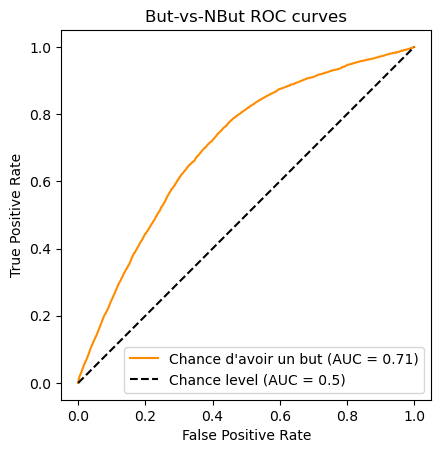

In [164]:
RocCurveDisplay.from_predictions(
    y_val,
    y_score[:, 1],
    name="Chance d'avoir un but",
    color="darkorange",
    plot_chance_level=True,
)
fpr, tpr, thresholds = roc_curve(np.array(y_val), y_score[:,1], pos_label=1)
AUC = auc(fpr, tpr)
print ( f'AUC metric : {AUC}')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("But-vs-NBut ROC curves")
plt.legend()
plt.show()

In [ ]:
Centiles_plot(y_val, y_score[:,1])

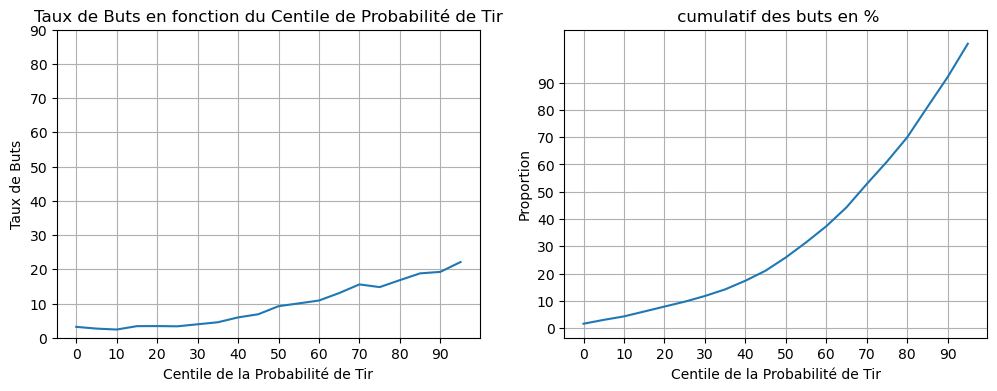

In [170]:
centiles = np.percentile(y_score[:,1], np.arange(0, 101, 5))  # Centiles de 0 à 100 par pas de 10

# Créer des listes pour stocker les taux de buts et les centiles correspondants
taux_buts = []
cumulative_goal_proportion = []
total_goals = sum(y_val)
cumulative_goals = 0
# Diviser les probabilités en groupes basés sur les centiles et calculer le taux de buts
for i in range(20):
    lower_bound = centiles[i]
    upper_bound = centiles[i + 1]
    
    # Filtrer les probabilités dans la plage du centile actuel
    
    # Calculer le taux de buts pour ce groupe
    indices = np.where((y_score[:,1] >= lower_bound) & (y_score[:,1] <= upper_bound))
    goal_rate = sum(y_val.iloc[indices]) / len(y_val.iloc[indices])*100
    filtered_data = y_val.iloc[indices]
    cumulative_goals += sum(filtered_data)
    
    
    # Stocker le taux de buts et le centile correspondant
    taux_buts.append(goal_rate)
    cumulative_goal_proportion.append((cumulative_goals / total_goals)*100)

# Tracer le graphique
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(np.arange(0, 100, 5), taux_buts, linestyle='-')
axes[0].set_xlabel("Centile de la Probabilité de Tir")
axes[0].set_ylabel("Taux de Buts")
axes[0].set_title("Taux de Buts en fonction du Centile de Probabilité de Tir")
axes[0].grid(True)
axes[0].set_xticks(np.arange(0, 100, 10))
axes[0].set_yticks(np.arange(0, 100, 10))


axes[1].plot(np.arange(0, 100, 5), cumulative_goal_proportion, linestyle='-')
axes[1].set_xlabel("Centile de la Probabilité de Tir")
axes[1].set_ylabel("Proportion")
axes[1].set_title(" cumulatif des buts en %")
axes[1].grid(True)
axes[1].set_xticks(np.arange(0, 100, 10))
axes[1].set_yticks(np.arange(0, 100, 10))

plt.show()

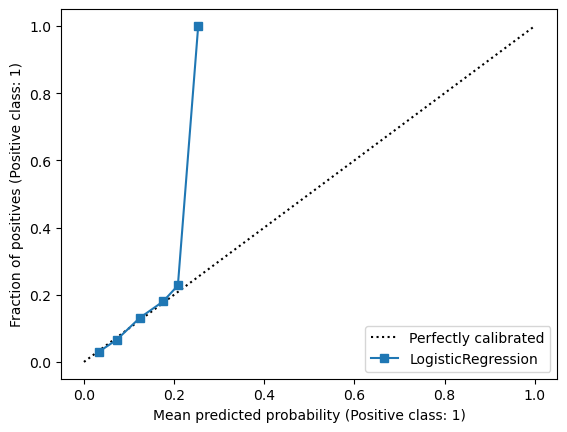

In [159]:
disp = CalibrationDisplay.from_estimator(clf,reshaped_X_val, reshaped_y_val, n_bins=20)
plt.show()